1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [1]:
import selenium
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import pandas as pd

In [27]:
driver=webdriver.Chrome()

In [28]:
driver.get("https://www.amazon.in/")

In [29]:
#Take product name as input from the user
product=input("Enter the product to search: ")

Enter the product to search: guitar


In [30]:
#Type the product name into the search bar
search_bar=driver.find_element(By.ID,'twotabsearchtextbox')
search_bar.send_keys(product)

In [31]:
#Click the search button
search_button=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_button.click()

2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [32]:
product_url=[]

In [33]:
import time

In [34]:
#Scrape the product URLs from the first 3 pages
start=0
end=3
for page in range(start,end):
    url=driver.find_elements(By.XPATH,'//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]/a')
    for i in url:
        product_url.append(i.get_attribute('href'))
    next_button=driver.find_element(By.XPATH,'//a[contains(@class,"s-pagination-next")]')
    if next_button:
        next_button.click()
        time.sleep(3)
    else:
        break

In [35]:
len(product_url)

167

In [36]:
brand_name=[]
product_name=[]
price=[]
return_exchange=[]
expected_delivery=[]
availability=[]

In [37]:
from selenium.common.exceptions import NoSuchElementException
import re

In [38]:
#Scrape the details of all the products
for i in product_url:
    driver.get(i)
    time.sleep(5)
    try:
        br_name=driver.find_element(By.ID,'bylineInfo')
        bn=br_name.text
        bn=re.sub(r'(Visit the )|( Store)|(Brand: )','',bn)
        brand_name.append(bn)
    except NoSuchElementException:
        brand_name.append("-")
    pr_name=driver.find_element(By.XPATH,'//span[@class="a-size-large product-title-word-break"]')
    product_name.append(pr_name.text)
    try:
        pr=driver.find_element(By.XPATH,'//span[@class="a-price aok-align-center reinventPricePriceToPayMargin priceToPay"]/span[2]/span[2]')
        price.append(pr.text)
    except NoSuchElementException:
        price.append("-")
    try:
        ret_exchange=driver.find_element(By.XPATH,'//span[@class="a-declarative"]/div[2]/span')
        return_exchange.append(ret_exchange.text)
    except NoSuchElementException:
        return_exchange.append("-")
    try:
        exp_delivery=driver.find_elements(By.XPATH,'//div[@class="a-spacing-base"]/span/span[1]')
        if exp_delivery==None:
            expected_delivery.append("-")
        else:
            expected_delivery.append(exp_delivery[0].text)
    except NoSuchElementException:
        expected_delivery.append("-")
    try:
        avail=driver.find_element(By.XPATH,'//span[@class="a-size-medium a-color-success"]')
        availability.append(avail.text)
    except NoSuchElementException:
        availability.append("-")

In [39]:
print(len(brand_name),len(product_name),len(price),len(return_exchange),len(expected_delivery),len(availability))

167 167 167 167 167 167


In [46]:
#Create a Data Frame from the scraped data
df=pd.DataFrame({'Product URL':product_url,'Brand Name':brand_name,'Name of the Product':product_name,'Price':price,'Return/Exchange':return_exchange,'Expected Delivery':expected_delivery,'Availability':availability})

In [47]:
#Display the Data Frame
df

,Product URL,Brand Name,Name of the Product,Price,Return/Exchange,Expected Delivery,Availability
0,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","4,899",7 days Replacement,"Saturday, 20 April",In stock
1,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Kadence,Kadence Frontier guitar with Online Guitar lea...,"4,799",7 days Replacement,"Saturday, 20 April",In stock
2,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Kadence,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"9,999",7 days Replacement,"Saturday, 20 April",In stock
3,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,MOCKING BIRD,MOCKING BIRD 38 Inch Acoustic Guitar for Begin...,"3,246",7 days Replacement,"Saturday, 20 April",In stock
4,https://www.amazon.in/Acoustic-Cutaway-RDS-Str...,JUAREZ,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","2,199",7 days Replacement,"Monday, 22 April",In stock
...,...,...,...,...,...,...,...
162,https://www.amazon.in/Juarez-Acoustic-Guitar-C...,JUAREZ,"Juarez Retro Acoustic Guitar, 38 Inch Cutaway,...","2,999",7 days Replacement,"Monday, 22 April",In stock
163,https://www.amazon.in/Yamaha-FS800-Acoustic-Gu...,YAMAHA,Yamaha FS800 Small Body Solid Top Acoustic Gui...,"20,489",7 days Replacement,"Monday, 22 April",-
164,https://www.amazon.in/Acoustic-Cutaway-3TS-Str...,JUAREZ,"Juarez Wood Acoustic Guitar, [LEFT HANDED] 96....","2,759",7 days Replacement,"Monday, 22 April",In stock
165,https://www.amazon.in/Junior-Acoustic-Guitar-S...,VAULT,Vault Junior 30 Inch Acoustic Guitar for Kids ...,"4,199",7 days Replacement,"Saturday, 20 April",In stock


In [48]:
#Save the Data Frame into a CSV file
df.to_csv('amazon_products.csv', index=False)

In [49]:
#Read the CSV file into a Data Frame
products=pd.read_csv('amazon_products.csv')

In [50]:
#Display the Data Frame
products

,Product URL,Brand Name,Name of the Product,Price,Return/Exchange,Expected Delivery,Availability
0,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","4,899",7 days Replacement,"Saturday, 20 April",In stock
1,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Kadence,Kadence Frontier guitar with Online Guitar lea...,"4,799",7 days Replacement,"Saturday, 20 April",In stock
2,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Kadence,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"9,999",7 days Replacement,"Saturday, 20 April",In stock
3,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,MOCKING BIRD,MOCKING BIRD 38 Inch Acoustic Guitar for Begin...,"3,246",7 days Replacement,"Saturday, 20 April",In stock
4,https://www.amazon.in/Acoustic-Cutaway-RDS-Str...,JUAREZ,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","2,199",7 days Replacement,"Monday, 22 April",In stock
...,...,...,...,...,...,...,...
162,https://www.amazon.in/Juarez-Acoustic-Guitar-C...,JUAREZ,"Juarez Retro Acoustic Guitar, 38 Inch Cutaway,...","2,999",7 days Replacement,"Monday, 22 April",In stock
163,https://www.amazon.in/Yamaha-FS800-Acoustic-Gu...,YAMAHA,Yamaha FS800 Small Body Solid Top Acoustic Gui...,"20,489",7 days Replacement,"Monday, 22 April",-
164,https://www.amazon.in/Acoustic-Cutaway-3TS-Str...,JUAREZ,"Juarez Wood Acoustic Guitar, [LEFT HANDED] 96....","2,759",7 days Replacement,"Monday, 22 April",In stock
165,https://www.amazon.in/Junior-Acoustic-Guitar-S...,VAULT,Vault Junior 30 Inch Acoustic Guitar for Kids ...,"4,199",7 days Replacement,"Saturday, 20 April",In stock


3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [122]:
import selenium
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import pandas as pd
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import urllib.parse

In [123]:
driver=webdriver.Chrome()

In [124]:
driver.get("https://images.google.com/")

In [125]:
keywords=['fruits','cars','machine learning','guitar','cakes']
fruits=[]
cars=[]
machine_learning=[]
guitar=[]
cakes=[]
image_lists=[fruits,cars,machine_learning,guitar,cakes]
k=0

In [126]:
for i in keywords:
    search_bar=WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH,'//div[@class="a4bIc"]/textarea')))
    if search_bar.get_attribute('value'):
        search_bar.clear()
    search_bar.send_keys(i)
    search_button=driver.find_element(By.XPATH,'//span[@class="z1asCe MZy1Rb"]')
    search_button.click()
    time.sleep(3)
    image_url=driver.find_elements(By.XPATH,'//img[@class="YQ4gaf"]')
    for j in image_url[0:10]:
        url=j.get_attribute('src')
        url=urllib.parse.unquote(url)
        image_lists[k].append(url)
    k+=1

fruits image urls
['https://www.google.com/logos/doodles/2024/temp-india-national-elections-2024-6753651837110484-shs.png', 'https://www.google.com/logos/doodles/2024/temp-india-national-elections-2024-6753651837110484-shs.png', '', '', '', '', '', '', '', '']


cars image urls
['https://www.google.com/logos/doodles/2024/temp-india-national-elections-2024-6753651837110484-shs.png', 'https://www.google.com/logos/doodles/2024/temp-india-national-elections-2024-6753651837110484-shs.png', '', '', '', '', '', '', '', '']


machine learning image urls
['https://www.google.com/logos/doodles/2024/temp-india-national-elections-2024-6753651837110484-shs.png', 'https://www.google.com/logos/doodles/2024/temp-india-national-elections-2024-6753651837110484-shs.png', '', '', '', '', '', '', '', '']


guitar image urls
['https://www.google.com/logos/doodles/2024/temp-india-national-elections-2024-6753651837110484-shs.png', 'https://www.google.com/logos/doodles/2024/temp-india-national-elections-2024-6
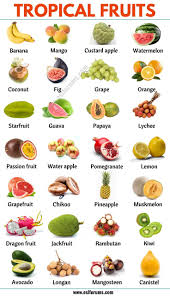
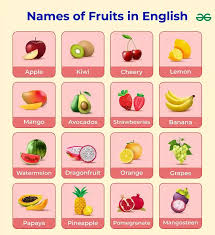
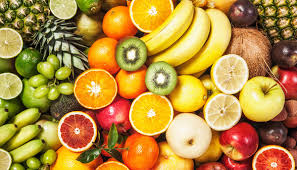
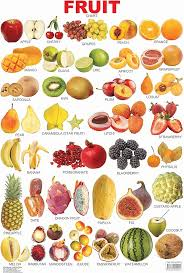
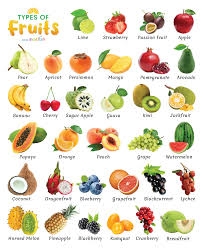
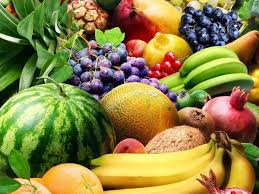
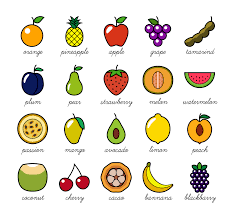
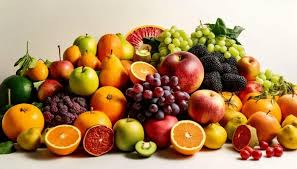
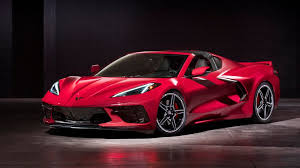
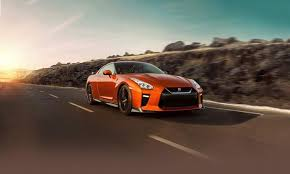
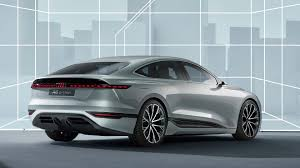
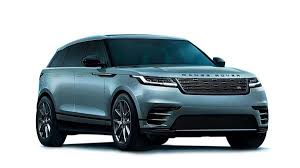
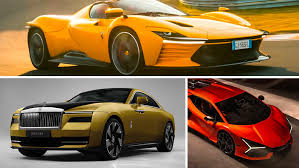
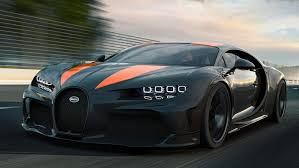
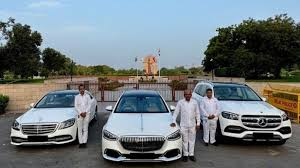
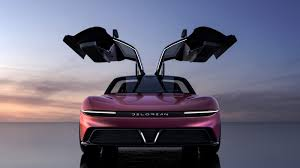
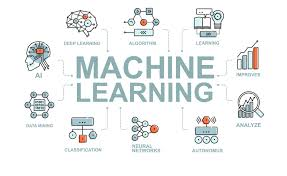
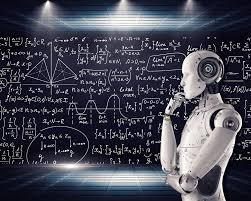
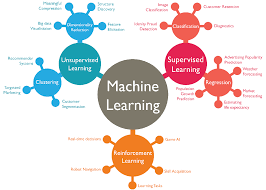
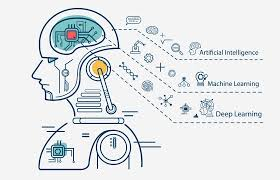
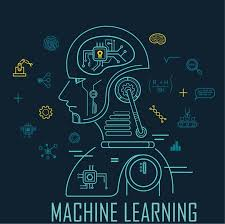
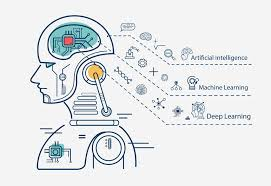
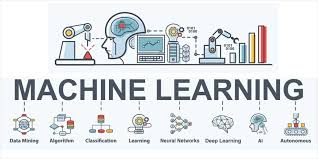
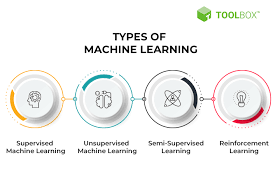
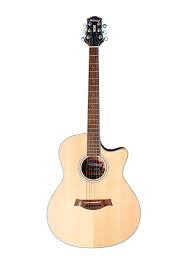
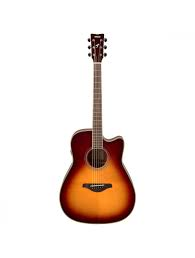
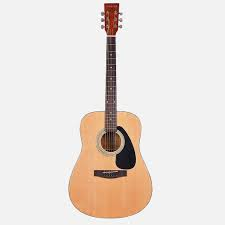
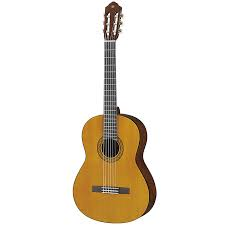
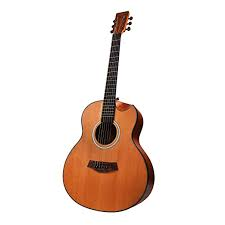
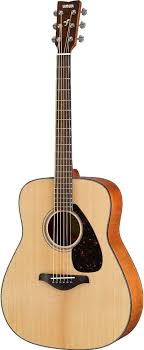
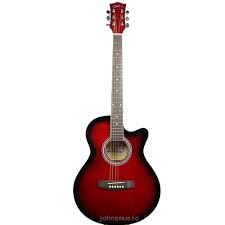
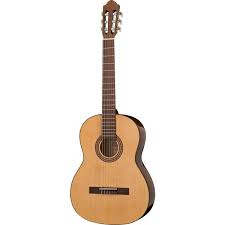
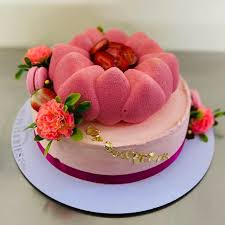
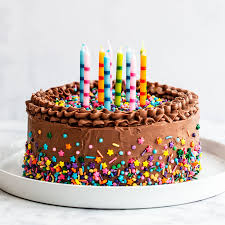
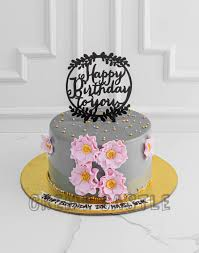
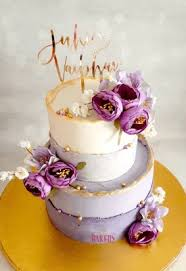
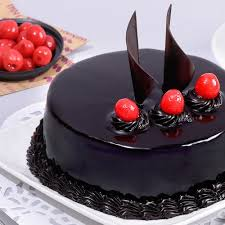
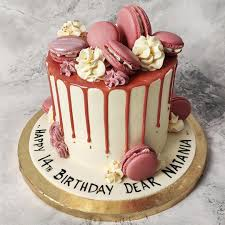
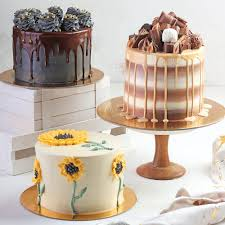
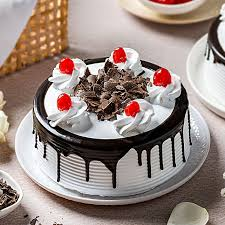

In [135]:
for i in range(0,5):
    print(f'{keywords[i]} image urls')
    print(image_lists[i])
    print('\n')

4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [1]:
import selenium
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import pandas as pd
import time
from selenium.common.exceptions import NoSuchElementException
import re

In [2]:
driver=webdriver.Chrome()

In [3]:
driver.get("https://www.flipkart.com/")

In [4]:
#Type "smartphone" in the search bar
search_bar=driver.find_element(By.CLASS_NAME,'Pke_EE')
search_bar.send_keys('smartphone')

In [5]:
#Click the search button
search_button=driver.find_element(By.CLASS_NAME,'_2iLD__')
search_button.click()

In [6]:
brand_name=[]
smartphone_name=[]
colour=[]
ram=[]
rom=[]
primary_camera=[]
secondary_camera=[]
display_size=[]
battery_capacity=[]
price=[]
product_url=[]

In [7]:
#Scrape smartphone details
name_tags=driver.find_elements(By.XPATH,'//div[@class="KzDlHZ"]')
for i in name_tags:
    k=re.match(r'\w+',i.text).group()
    brand_name.append(k)
for i in name_tags:
    smartphone_name.append(i.text)
for i in name_tags:
    k=re.search(r'\((.*?)\,',i.text).group(1)
    colour.append(k)
try:
    memory_tags=driver.find_elements(By.XPATH,'//ul[@class="G4BRas"]/li[1]')
    for i in memory_tags:
        k=re.split(r'\|',i.text,maxsplit=1)
        ram.append(k[0].strip())
        rom.append(k[1].strip())
except NoSuchElementException:
    ram.append("-")
    rom.append("-")
try:
    camera_tags=driver.find_elements(By.XPATH,'//ul[@class="G4BRas"]/li[3]')
    for i in camera_tags:
        k=re.split(r'\|',i.text,maxsplit=1)
        if len(k)==1:
            primary_camera.append(k)
            secondary_camera.append("-")
        else:
            primary_camera.append(k[0].strip())
            secondary_camera.append(k[1].strip())
except NoSuchElementException:
    primary_camera.append("-")
    secondary_camera.append("-")
try:
    display_size_tags=driver.find_elements(By.XPATH,'//ul[@class="G4BRas"]/li[2]')
    for i in display_size_tags:
        display_size.append(i.text)
except NoSuchElementException:
    display_size.append("-")
try:
    battery_capacity_tags=driver.find_elements(By.XPATH,'//ul[@class="G4BRas"]/li[4]')
    for i in battery_capacity_tags:
        battery_capacity.append(i.text)
except NoSuchElementException:
    battery_capacity.append("-")
try:
    price_tags=driver.find_elements(By.XPATH,'//div[@class="Nx9bqj _4b5DiR"]')
    for i in price_tags:
        price.append(i.text)
except NoSuchElementException:
    price.append("-")
product_url_tags=driver.find_elements(By.XPATH,'//a[@class="CGtC98"]')
for i in product_url_tags:
    product_url.append(i.get_attribute('href'))

In [12]:
#Creae and display Data Frame from the scraped data
df=pd.DataFrame({
    'Brand Name':brand_name,
    'Smartphone Name':smartphone_name,
    'Colour':colour,
    'RAM':ram,
    'Storage (ROM)':rom,
    'Primary Camera':primary_camera,
    'Seconday Camera':secondary_camera,
    'Display Size':display_size,
    'Battery Capacity':battery_capacity,
    'Price':price,
    'Product URL':product_url
})
df

,Brand Name,Smartphone Name,Colour,RAM,Storage (ROM),Primary Camera,Seconday Camera,Display Size,Battery Capacity,Price,Product URL
0,Motorola,"Motorola G34 5G (Ice Blue, 128 GB)",Ice Blue,8 GB RAM,128 GB ROM,50MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/motorola-g34-5g-ice-b...
1,Motorola,"Motorola G34 5G (Charcoal Black, 128 GB)",Charcoal Black,8 GB RAM,128 GB ROM,50MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/motorola-g34-5g-charc...
2,Motorola,"Motorola G34 5G (Ocean Green, 128 GB)",Ocean Green,8 GB RAM,128 GB ROM,50MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/motorola-g34-5g-ocean...
3,POCO,"POCO M6 Pro 5G (Power Black, 128 GB)",Power Black,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP + 2MP,8MP Front Camera,17.25 cm (6.79 inch) Full HD+ Display,5000 mAh Battery,"₹9,999",https://www.flipkart.com/poco-m6-pro-5g-power-...
4,SAMSUNG,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",B.A.E. Purple,6 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP + 2MP,13MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Battery,"₹10,490",https://www.flipkart.com/samsung-galaxy-f14-5g...
5,POCO,"POCO M6 Pro 5G (Forest Green, 128 GB)",Forest Green,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP + 2MP,8MP Front Camera,17.25 cm (6.79 inch) Full HD+ Display,5000 mAh Battery,"₹9,999",https://www.flipkart.com/poco-m6-pro-5g-forest...
6,POCO,POCO M6 5G - Locked with Airtel Prepaid (Polar...,Polaris Green,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP Rear Camera,5MP Front Camera,17.12 cm (6.74 inch) HD+ Display,5000 mAh Battery,"₹8,599",https://www.flipkart.com/poco-m6-5g-locked-air...
7,REDMI,"REDMI 13C (Starshine Green, 128 GB)",Starshine Green,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP Rear Camera,8MP Front Camera,17.12 cm (6.74 inch) HD+ Display,5000 mAh Battery,"₹7,699",https://www.flipkart.com/redmi-13c-starshine-g...
8,Motorola,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",Soothing Sea,12 GB RAM,256 GB ROM,50MP + 13MP,32MP Front Camera,16.64 cm (6.55 inch) Full HD+ Display,5000 mAh Battery,"₹24,999",https://www.flipkart.com/motorola-edge-40-neo-...
9,REDMI,"REDMI 13C (Stardust Black, 128 GB)",Stardust Black,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP Rear Camera,8MP Front Camera,17.12 cm (6.74 inch) HD+ Display,5000 mAh Battery,"₹7,699",https://www.flipkart.com/redmi-13c-stardust-bl...


In [17]:
#Save the Data Frame into a CSV file
df.to_csv('Smartphones.csv',index=False)

In [18]:
#Read the CSV file into a Data Frame
products=pd.read_csv('Smartphones.csv')

In [19]:
#Display the Data Frame
products

,Brand Name,Smartphone Name,Colour,RAM,Storage (ROM),Primary Camera,Seconday Camera,Display Size,Battery Capacity,Price,Product URL
0,Motorola,"Motorola G34 5G (Ice Blue, 128 GB)",Ice Blue,8 GB RAM,128 GB ROM,50MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/motorola-g34-5g-ice-b...
1,Motorola,"Motorola G34 5G (Charcoal Black, 128 GB)",Charcoal Black,8 GB RAM,128 GB ROM,50MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/motorola-g34-5g-charc...
2,Motorola,"Motorola G34 5G (Ocean Green, 128 GB)",Ocean Green,8 GB RAM,128 GB ROM,50MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹11,999",https://www.flipkart.com/motorola-g34-5g-ocean...
3,POCO,"POCO M6 Pro 5G (Power Black, 128 GB)",Power Black,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP + 2MP,8MP Front Camera,17.25 cm (6.79 inch) Full HD+ Display,5000 mAh Battery,"₹9,999",https://www.flipkart.com/poco-m6-pro-5g-power-...
4,SAMSUNG,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",B.A.E. Purple,6 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP + 2MP,13MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,6000 mAh Battery,"₹10,490",https://www.flipkart.com/samsung-galaxy-f14-5g...
5,POCO,"POCO M6 Pro 5G (Forest Green, 128 GB)",Forest Green,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP + 2MP,8MP Front Camera,17.25 cm (6.79 inch) Full HD+ Display,5000 mAh Battery,"₹9,999",https://www.flipkart.com/poco-m6-pro-5g-forest...
6,POCO,POCO M6 5G - Locked with Airtel Prepaid (Polar...,Polaris Green,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP Rear Camera,5MP Front Camera,17.12 cm (6.74 inch) HD+ Display,5000 mAh Battery,"₹8,599",https://www.flipkart.com/poco-m6-5g-locked-air...
7,REDMI,"REDMI 13C (Starshine Green, 128 GB)",Starshine Green,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP Rear Camera,8MP Front Camera,17.12 cm (6.74 inch) HD+ Display,5000 mAh Battery,"₹7,699",https://www.flipkart.com/redmi-13c-starshine-g...
8,Motorola,"Motorola Edge 40 Neo (Soothing Sea, 256 GB)",Soothing Sea,12 GB RAM,256 GB ROM,50MP + 13MP,32MP Front Camera,16.64 cm (6.55 inch) Full HD+ Display,5000 mAh Battery,"₹24,999",https://www.flipkart.com/motorola-edge-40-neo-...
9,REDMI,"REDMI 13C (Stardust Black, 128 GB)",Stardust Black,4 GB RAM,128 GB ROM | Expandable Upto 1 TB,50MP Rear Camera,8MP Front Camera,17.12 cm (6.74 inch) HD+ Display,5000 mAh Battery,"₹7,699",https://www.flipkart.com/redmi-13c-stardust-bl...


5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [35]:
import selenium
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re

In [36]:
driver=webdriver.Chrome()

In [37]:
driver.get("https://www.google.com/maps")

In [38]:
#Get city name from the user
city=input("Enter city name: ")
#Enter city name in the search bar
search_bar=driver.find_element(By.XPATH,'//input[@class="searchboxinput xiQnY"]')
search_bar.send_keys(city)
#Click the search button
search_button=driver.find_element(By.XPATH,'//span[@class="google-symbols"]')
search_button.click()
time.sleep(4)
# Get the current URL
current_url=driver.current_url
# Extract latitude and longitude from the URL and display
match = re.search(r'@([-+]?\d+\.\d+),([-+]?\d+\.\d+)',current_url)
if match:
    latitude=match.group(1)
    print("Latitude: ",latitude)
    longitude=match.group(2)
    print("Longitude: ",longitude)
else:
    print("Coordinates not found.")

Enter city name: New Delhi
Latitude:  28.5275544
Longitude:  77.0441684


7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [96]:
import selenium
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re
from selenium.webdriver.common.action_chains import ActionChains

In [97]:
driver=webdriver.Chrome()

In [98]:
driver.get("https://www.forbes.com/")

In [99]:
#Click the menu button
menu_button=driver.find_element(By.CLASS_NAME,'hamburger_svg__fs-icon')
menu_button.click()
time.sleep(2)
#Hover over the "Billionaires" menu option
menu_option=driver.find_element(By.CLASS_NAME,'mpBfVZz3')
ActionChains(driver).move_to_element(menu_option).perform()
time.sleep(2)
#Click the "World's Billionaires" sub-menu option
sub_menu_option=driver.find_element(By.XPATH,'//a[text()="World\'s Billionaires"]')
sub_menu_option.click()

In [102]:
rank=[]
name=[]
net_worth=[]
age=[]
citizenship=[]
source=[]
industry=[]

In [103]:
#Scrape billionaires' details
while True:
    rank_tags=driver.find_elements(By.XPATH,'//div[contains(@class,"Table_tableRow__lF_cY")]/div[1]/div')
    for i in rank_tags:
        rank.append(i.text)
    name_tags=driver.find_elements(By.XPATH,'//div[contains(@class,"Table_tableRow__lF_cY")]/div[2]')
    for i in name_tags:
        name.append(i.text)
    net_worth_tags=driver.find_elements(By.XPATH,'//div[contains(@class,"Table_tableRow__lF_cY")]/div[3]/span')
    for i in net_worth_tags:
        net_worth.append(i.text)
    age_tags=driver.find_elements(By.XPATH,'//div[contains(@class,"Table_tableRow__lF_cY")]/div[4]/div')
    for i in age_tags:
        age.append(i.text)
    citizenship_tags=driver.find_elements(By.XPATH,'//div[contains(@class,"Table_tableRow__lF_cY")]/div[5]')
    for i in citizenship_tags:
        citizenship.append(i.text)
    source_tags=driver.find_elements(By.XPATH,'//div[contains(@class,"Table_tableRow__lF_cY")]/div[6]')
    for i in source_tags:
        source.append(i.text)
    industry_tags=driver.find_elements(By.XPATH,'//div[contains(@class,"Table_tableRow__lF_cY")]/div[7]')
    for i in industry_tags:
        industry.append(i.text)
    arrow=driver.find_elements(By.XPATH,'//button[@class="t7aCs7DQ _0BYTGi5u TNAO5JyH bMlalnxk _5nHoWK7c"]')
    if arrow[1].is_enabled():
        arrow[1].click()
        time.sleep(3)
    else:
        break
        driver.close()

In [106]:
#Create and display Data Frame from the scraped data
df=pd.DataFrame({
    'Rank':rank,
    'Name':name,
    'Net Worth':net_worth,
    'Age':age,
    'Citizenship':citizenship,
    'Source':source,
    'Industry':industry
})
df

,Rank,Name,Net Worth,Age,Citizenship,Source,Industry
0,1.,Bernard Arnault & family,$233 B,75,France,LVMH,Fashion & Retail
1,2.,Elon Musk,$195 B,52,United States,"Tesla, SpaceX",Automotive
2,3.,Jeff Bezos,$194 B,60,United States,Amazon,Technology
3,4.,Mark Zuckerberg,$177 B,39,United States,Facebook,Technology
4,5.,Larry Ellison,$141 B,79,United States,Oracle,Technology
...,...,...,...,...,...,...,...
2776,2692.,Zhang Hong,$1 B,N/A,China,Solar,Energy
2777,2692.,Zheng Xiaodong,$1 B,60,China,Manufacturing,Manufacturing
2778,2692.,Zhong Sheng Jian,$1 B,66,Singapore,Real estate,Real Estate
2779,2692.,Zhou Junjie,$1 B,55,China,equipment,Manufacturing


9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [19]:
import selenium
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import pandas as pd
import time
import re
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException

In [20]:
driver=webdriver.Chrome()

In [21]:
driver.get("https://www.hostelworld.com/")

In [22]:
#Type "London" in the location field
location=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input')
location.send_keys('London')

In [23]:
#Click "London" in the drop down menu
london=driver.find_elements(By.XPATH,'//button[@class="item-content"]')
london[0].click()

In [24]:
#Click the search button
search_button=driver.find_element(By.XPATH,'//button[@class="btn-content large-button"]')
search_button.click()

In [25]:
hostel_url=[]
name=[]
distance=[]
rating=[]
total_reviews=[]
overall_review=[]
privates_from_price=[]
dorms_from_price=[]
facilities=[]
description=[]

In [ ]:
#Scrape details of all hostels
hostel_url_tags=driver.find_elements(By.XPATH,'//a[@class="property-card-container horizontal"]')
for i in hostel_url_tags:
    hostel_url.append(i.get_attribute('href'))
name_tags=driver.find_elements(By.XPATH,'//div[@class="property-name"]/span')
for i in name_tags:
    name.append(i.text)
try:
    distance_tags=driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
    for i in distance_tags:
        k=i.text
        k=re.sub(r'(- )','',k)
        distance.append(k)
except NoSuchElementException:
    distance.append("-")
try:
    rating_tags=driver.find_elements(By.XPATH,'//div[@class="rating medium theme-null"]/div[1]/span[1]')
    for i in rating_tags:
        rating.append(i.text)
except NoSuchElementException:
    rating.append("-")
try:
    total_reviews_tags=driver.find_elements(By.XPATH,'//div[@class="rating medium theme-null"]/div[2]/span[1]')
    for i in total_reviews_tags:
        k=i.text
        k=re.sub(r'[()]','',k)
        total_reviews.append(k)
except NoSuchElementException:
    total_reviews.append("-")
try:
    overall_review_tags=driver.find_elements(By.XPATH,'//div[@class="rating medium theme-null"]/div[1]/span[2]')
    for i in overall_review_tags:
        overall_review.append(i.text)
except NoSuchElementException:
    overall_review.append("-")
try:
    privates_from_price_tags=driver.find_elements(By.XPATH,'')